In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
#fake=pd.read_csv('/content/drive/My Drive/Fake (1).csv')
#true=pd.read_csv('/content/drive/My Drive/True (1).csv')
fake=pd.read_csv('/content/drive/My Drive/Shamine Macwan/Fake.csv')
true=pd.read_csv('/content/drive/My Drive/Shamine Macwan/True.csv')

In [3]:
fake['label'] = 1
true['label'] = 0


In [34]:
data=pd.concat([fake,true],axis=0,ignore_index=True)

In [35]:
#data.sample(10)
data

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [36]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [37]:

data.dropna()
data.shape

(44898, 5)

In [38]:
data['text_title']=data['text'] + " " + data['title']

In [39]:
data.sample(5)

,title,text,subject,date,label,text_title
2356,Publisher Announces Books By The Obamas Are O...,Penguin Random House announced on Tuesday nigh...,News,"February 28, 2017",1,Penguin Random House announced on Tuesday nigh...
43643,Florida nursing home where deaths occurred was...,(Reuters) - Florida Power & Light said on Wedn...,worldnews,"September 13, 2017",0,(Reuters) - Florida Power & Light said on Wedn...
7997,GOP Board Of Education Candidate May Be The C...,There have been plenty of accusations made aga...,News,"February 19, 2016",1,There have been plenty of accusations made aga...
41353,Trump to host Singapore's prime minister Oct. ...,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"October 10, 2017",0,WASHINGTON (Reuters) - U.S. President Donald T...
3124,President Obama Ends His Presidency With 75 S...,"As President Obama prepares to leave office, h...",News,"January 7, 2017",1,"As President Obama prepares to leave office, h..."


In [40]:
data.drop(['text'],axis=1,inplace=True)
data.drop(['title'],axis=1,inplace=True)


In [41]:
data_new=data[['text_title','label']]
data_new.reset_index()
#data_new=data_new.drop(['index'],axis=1,inplace=True)
#data_new.sample(5)
data_new

,text_title,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44895,MINSK (Reuters) - In the shadow of disused Sov...,0
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [42]:
#Cleaning the dataset
data_new['text_title']=data_new['text_title'].str.lower()
data_new['text_title']=data_new['text_title'].str.replace('[^a-zA-Z]',' ')
data_new['text_title']=[word.lower() for word in data_new['text_title']]
data_new.sample(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,text_title,label
26899,washington reuters president donald trump ...,0
5381,another day another example of right wing rac...,1
27338,seattle reuters seattle mayor ed murray w...,0
8973,during an interview with a bbc live host a te...,1
27733,palatka fla reuters at a town hall in hi...,0


In [43]:
#tokenizing the dataset
import nltk
nltk.download('punkt')
from nltk.tokenize import WhitespaceTokenizer
data_new['tokenize']=data_new['text_title'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [44]:
#data_new['text_title']
data_new.head()

,text_title,label,tokenize
0,donald trump just couldn t wish all americans ...,1,"[donald, trump, just, couldn, t, wish, all, am..."
1,house intelligence committee chairman devin nu...,1,"[house, intelligence, committee, chairman, dev..."
2,on friday it was revealed that former milwauk...,1,"[on, friday, it, was, revealed, that, former, ..."
3,on christmas day donald trump announced that ...,1,"[on, christmas, day, donald, trump, announced,..."
4,pope francis used his annual christmas day mes...,1,"[pope, francis, used, his, annual, christmas, ..."


In [ ]:
data_new.sample(5)

,text_title,label,tokenize
41476,moscow reuters the kremlin said on monday ...,0,"[moscow, reuters, the, kremlin, said, on, mond..."
27670,tokyo reuters u s vice president mike pen...,0,"[tokyo, reuters, u, s, vice, president, mike, ..."
3852,let s get something straight here americans ...,1,"[let, s, get, something, straight, here, ameri..."
12608,as a mother of three young girls hillary is t...,1,"[as, a, mother, of, three, young, girls, hilla..."
25891,tallinn reuters u s vice president mike p...,0,"[tallinn, reuters, u, s, vice, president, mike..."


In [45]:
#use stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
data_new['stop_w']=data_new['tokenize'].apply(lambda x:[w for w in x if not w in stop])
data_new.sample(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text_title,label,tokenize,stop_w
30755,beijing reuters u s president elect donal...,0,"[beijing, reuters, u, s, president, elect, don...","[beijing, reuters, u, president, elect, donald..."
8873,ted cruz again showed that his campaign is wei...,1,"[ted, cruz, again, showed, that, his, campaign...","[ted, cruz, showed, campaign, weirder, previou..."
12184,in a speech at macdill air force base in tamp...,1,"[in, a, speech, at, macdill, air, force, base,...","[speech, macdill, air, force, base, tampa, flo..."
40491,beijing reuters foreign companies in china...,0,"[beijing, reuters, foreign, companies, in, chi...","[beijing, reuters, foreign, companies, china, ..."
32445,cincinnati reuters liberal elizabeth warre...,0,"[cincinnati, reuters, liberal, elizabeth, warr...","[cincinnati, reuters, liberal, elizabeth, warr..."


In [46]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
def lema_words(text):
  wnl=WordNetLemmatizer()
  return[wnl.lemmatize(w) for w in text]

data_new['lematize']=data_new['stop_w'].apply(lema_words)  
data_new.sample(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text_title,label,tokenize,stop_w,lematize
10357,the mccain family has requested everyone s pra...,1,"[the, mccain, family, has, requested, everyone...","[mccain, family, requested, everyone, prayers,...","[mccain, family, requested, everyone, prayer, ..."
23080,day in and day out cnn works hard to try and ...,1,"[day, in, and, day, out, cnn, works, hard, to,...","[day, day, cnn, works, hard, try, convince, am...","[day, day, cnn, work, hard, try, convince, ame..."
19935,this video will destroy black lives matter ...,1,"[this, video, will, destroy, black, lives, mat...","[video, destroy, black, lives, matter, share, ...","[video, destroy, black, life, matter, share, e..."
8754,a video uploaded to the facebook page operated...,1,"[a, video, uploaded, to, the, facebook, page, ...","[video, uploaded, facebook, page, operated, no...","[video, uploaded, facebook, page, operated, no..."
5102,many people will assume those who are religiou...,1,"[many, people, will, assume, those, who, are, ...","[many, people, assume, religious, automaticall...","[many, people, assume, religious, automaticall..."


In [48]:
for i in range(0,len(data_new)):
  data_new['lematized_words'][i] = ' '.join(data_new['lematize'][i])

data_new.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text_title,label,tokenize,stop_w,lematize,lematized_words
0,donald trump just couldn t wish all americans ...,1,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, wish, americans, happy, new, y...","[donald, trump, wish, american, happy, new, ye...",donald trump wish american happy new year leav...
1,house intelligence committee chairman devin nu...,1,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev...",house intelligence committee chairman devin nu...
2,on friday it was revealed that former milwauk...,1,"[on, friday, it, was, revealed, that, former, ...","[friday, revealed, former, milwaukee, sheriff,...","[friday, revealed, former, milwaukee, sheriff,...",friday revealed former milwaukee sheriff david...
3,on christmas day donald trump announced that ...,1,"[on, christmas, day, donald, trump, announced,...","[christmas, day, donald, trump, announced, wou...","[christmas, day, donald, trump, announced, wou...",christmas day donald trump announced would bac...
4,pope francis used his annual christmas day mes...,1,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, used, annual, christmas, day, ...","[pope, francis, used, annual, christmas, day, ...",pope francis used annual christmas day message...


In [49]:
# using vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv=CountVectorizer(max_features=1000)
vect=cv.fit_transform(data_new.lematized_words).toarray()

In [50]:
vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
tfidf_transformer=TfidfTransformer(use_idf=True)
tfidf_array=tfidf_transformer.fit_transform(vect).toarray()

In [52]:
tfidf_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.15212395, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# WordCloud

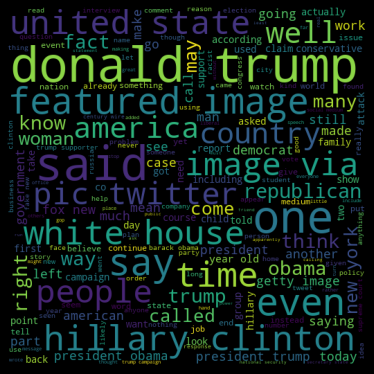

In [53]:
#creating a wordcloud
#wordcloud for fake data
import matplotlib.pyplot as plt
from wordcloud import WordCloud
fake_cloud=''.join(data_new[data_new.label==1]['lematized_words'])
fake_cloud=WordCloud(width=520, height=520).generate(fake_cloud)
plt.figure(figsize=(5,5),facecolor='k')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()




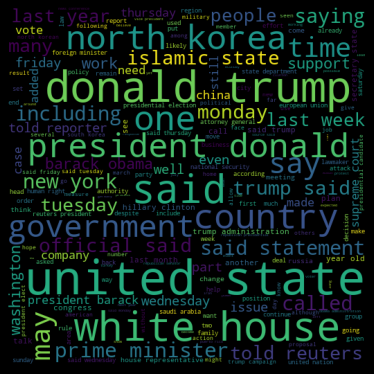

In [54]:
#wordcloud for true data
true_cloud=''.join(data_new[data_new.label==0]['lematized_words'])                                         
true_cloud=WordCloud(width=520, height=520).generate(true_cloud)
plt.figure(figsize=(5,5),facecolor='k')
plt.imshow(true_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [ ]:
'''fake_n=data_new[data_new.label==1]['lematized_words']
true_n=data_new[data_new.label==0]['lematized_words']
true_n=true_n.reset_index().drop(['index'],axis=1)'''

# Fitting the model

In [57]:
data_y=data_new['label']

In [58]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(tfidf_array,data_y,test_size=0.3,random_state=0)

In [59]:
xtrain

array([[0.04973265, 0.        , 0.        , ..., 0.04392645, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04381942, 0.        , 0.        , ..., 0.07740716, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Random forest classifier

In [60]:
from sklearn.ensemble import  RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(xtrain,ytrain)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [62]:
ypred=rfc.predict(xtest)
ypred

array([0, 0, 0, ..., 1, 1, 1])

Accuracy is 99.76
confusion_matrix:


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


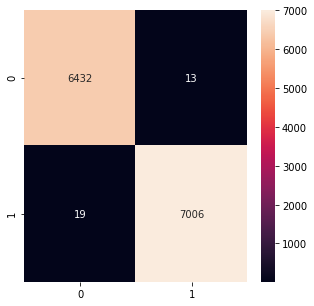

In [63]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#accuracy of the model
accuracy= round((accuracy_score(ytest,ypred)*100),2)
print("Accuracy is {}".format(accuracy))

#confusion matrix
print("confusion_matrix:")
LABEL=['0','1']
import matplotlib.pyplot as plt
import seaborn as sns
conf=confusion_matrix(ytest,ypred)
plt.figure(figsize=(5,5))
sns.heatmap(conf,xticklabels=LABEL,yticklabels=LABEL,annot=True,fmt='d')
plt.show()

# Logistic_Regression

In [64]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)

Accuracy is 98.51
confusion_matrix:


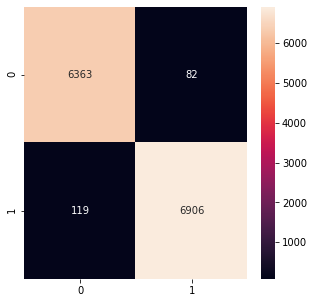

In [65]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#accuracy of the model
accuracy_lr= round((accuracy_score(ytest,y_pred)*100),2)
print("Accuracy is {}".format(accuracy_lr))

#confusion matrix
print("confusion_matrix:")
LABEL=['0','1']
import matplotlib.pyplot as plt
import seaborn as sns
conf_lr=confusion_matrix(ytest,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_lr,xticklabels=LABEL,yticklabels=LABEL,annot=True,fmt='d')
plt.show()

# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
dcf=DecisionTreeClassifier(random_state=0)
dcf.fit(xtrain,ytrain)
ypred_dcf=dcf.predict(xtest)
accuracy_dcf=round((accuracy_score(ytest,ypred_dcf)*100),2)
print("accuracy score of decison tree is {}".format(accuracy_dcf))

accuracy score of decison tree is 99.54


#SVM

In [67]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

===Classification_report===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6445
           1       0.99      0.99      0.99      7025

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

confusion_matrix:


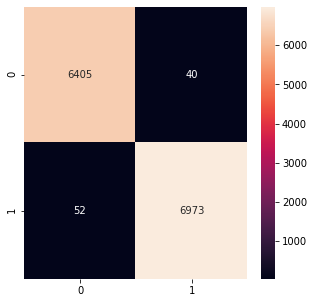

In [68]:
y_pred_svm=svm.predict(xtest)
print("===Classification_report===")
print(classification_report(ytest,y_pred_svm))
#confusion matrix
print("confusion_matrix:")
LABEL=['0','1']
import matplotlib.pyplot as plt
import seaborn as sns
conf_lr=confusion_matrix(ytest,y_pred_svm)
plt.figure(figsize=(5,5))
sns.heatmap(conf_lr,xticklabels=LABEL,yticklabels=LABEL,annot=True,fmt='d')
plt.show()


In [69]:
accuracy_svm=round((accuracy_score(ytest,y_pred_svm)*100),2)        
print("Accuracy of SVM is {}".format(accuracy_svm))

Accuracy of SVM is 99.32


# Neural_Network

In [70]:
input_dim=xtrain.shape[1]
input_dim

1000

In [71]:
from keras.layers import Dense,Dropout
from keras.models import Sequential

model=Sequential()
model.add(Dense(50,input_dim=input_dim,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [72]:
#history records training metrics for each epoch. 
history=model.fit(xtrain,ytrain,batch_size=20,epochs=10,verbose=1,validation_data=(xtest,ytest))
print(history.history.keys())

Epoch 1/10
1572/1572 [==============================] - 14s 9ms/step - loss: 0.1140 - accuracy: 0.9602 - val_loss: 0.0405 - val_accuracy: 0.9875
Epoch 2/10
1572/1572 [==============================] - 3s 2ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0298 - val_accuracy: 0.9910
Epoch 3/10
1572/1572 [==============================] - 3s 2ms/step - loss: 0.0223 - accuracy: 0.9937 - val_loss: 0.0265 - val_accuracy: 0.9918
Epoch 4/10
1572/1572 [==============================] - 3s 2ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.0282 - val_accuracy: 0.9921
Epoch 5/10
1572/1572 [==============================] - 3s 2ms/step - loss: 0.0111 - accuracy: 0.9971 - val_loss: 0.0320 - val_accuracy: 0.9906
Epoch 6/10
1572/1572 [==============================] - 3s 2ms/step - loss: 0.0078 - accuracy: 0.9978 - val_loss: 0.0290 - val_accuracy: 0.9926
Epoch 7/10
1572/1572 [==============================] - 3s 2ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0295 - val_accuracy

In [73]:
#testing data
loss_NN,accuracy_NN=model.evaluate(xtest,ytest,verbose=False)
print("testing data loss: {:.4f}".format(loss_NN))
print("testing data accuracy: {:.2f}".format((accuracy_NN)*100))

#training data
loss1,accuracy1=model.evaluate(xtrain,ytrain,verbose=False)
print("training data loss: {:.4f}".format(loss1))
print("training data accuracy: {:.2f}".format((accuracy1)*100))


testing data loss: 0.0330
testing data accuracy: 99.34
training data loss: 0.0006
training data accuracy: 99.98


# Visual representation of Neural_Network model

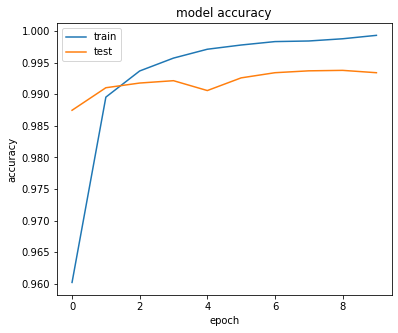

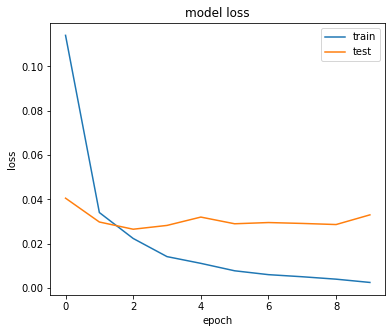

In [74]:
#Visualizing the Neural_Network model:

# summarize history for accuracy
#plt.subplot(1,2,1)
plt.figure(figsize=(6,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
#plt.subplot(1,2,2)
plt.figure(figsize=(6,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Comparing which model is the best

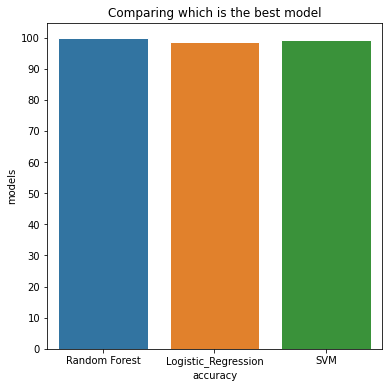

In [75]:
model=['Random Forest','Logistic_Regression','SVM']
acc=[accuracy,accuracy_lr,accuracy_svm]
plt.figure(figsize=(6,6))
plt.yticks(np.arange(0,110,10))
sns.set_style('white')
sns.barplot(model,acc)
plt.title('Comparing which is the best model')
plt.xlabel('accuracy')
plt.ylabel('models')
plt.show()

In [ ]:
Neural network accuracy=99.38
Logistics Regression=98.6
Random forest=99.7
SVM=99.37
Decision tree=99.45